<a href="https://colab.research.google.com/github/Ashutosh-Singh2209/Project-Case-Study-Investment/blob/main/Project_Case_Study_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Startups Funding Analysis

The dataset used contains funding information of the Indian startups from January 2015 to August 2017. This dataset is a part of the project from the Coding Ninjas Data Analyst course. The CSV file used here, that contains the dataset, is uploaded with this Jupyter notebook file in this repository.

## Feature Details

- SNo: Serial number.
- Date: Date of funding in format DD/MM/YYYY.
- StartupName: Name of the startup which got funded.
- IndustryVertical: Industry to which the startup belongs.
- SubVertical: Sub-category of the industry type.
- CityLocation: City which the startup is based out of.
- InvestorsName: Name of the investors involved in the funding round.
- InvestmentType: Either Private Equity or Seed Funding.
- AmountinUSD: Funding Amount in USD.
- Remarks: Other information, if any.

## Questions to Explore

1. **Find out what type of startups are getting funded in the last few years?**
2. **Who are the important investors?**
3. **What are the hot fields that get a lot of funding these days?**


## Number of Fundings

Now, let's check the trend of investments over the years. To do this, we need to first address an error in the 'Date' feature. After that, we can proceed to:

- Find the total number of fundings done in each year.
- Plot a line graph between the year and the number of fundings, with the year on the x-axis and the number of fundings on the y-axis.
- Print the year-wise total number of fundings as well.

But first, we need to resolve the error in the 'Date' feature.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

data = pd.read_csv('startup_funding.csv')
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [95]:
set(data['Date'])

{'01/03/2017',
 '01/04/2017',
 '01/05/2015',
 '01/05/2017',
 '01/06/2015',
 '01/06/2017',
 '01/07/2015',
 '01/07/2016',
 '01/07/2017',
 '01/08/2015',
 '01/08/2016',
 '01/08/2017',
 '01/09/2015',
 '01/1/2016',
 '01/10/2015',
 '01/11/2016',
 '01/12/2015',
 '01/12/2016',
 '01/2/2016',
 '01/3/2016',
 '01/4/2016',
 '01/5/2016',
 '01/6/2016',
 '01/7/2016',
 '01/8/2016',
 '01/9/2016',
 '02/01/2015',
 '02/01/2017',
 '02/02/2015',
 '02/02/2017',
 '02/03/2015',
 '02/03/2017',
 '02/05/2017',
 '02/06/2015',
 '02/06/2017',
 '02/07/2015',
 '02/07/2016',
 '02/08/2016',
 '02/08/2017',
 '02/09/2015',
 '02/10/2015',
 '02/11/2015',
 '02/11/2016',
 '02/12/2015',
 '02/12/2016',
 '02/2/2016',
 '02/3/2016',
 '02/5/2016',
 '02/6/2016',
 '03/01/2017',
 '03/02/2015',
 '03/02/2017',
 '03/03/2015',
 '03/03/2017',
 '03/04/2015',
 '03/04/2017',
 '03/05/2017',
 '03/06/2015',
 '03/07/2015',
 '03/07/2017',
 '03/08/2015',
 '03/08/2016',
 '03/09/2015',
 '03/10/2015',
 '03/10/2016',
 '03/11/2015',
 '03/11/2016',
 '03/12/

Manually checking the Date column values revealed two types of errors:

1. 22/01//2015
2. 12/05.2015

In the next cell, we will fix these errors in the 'Date' column and plot the number of fundings per year.


<ipython-input-96-5136be46ffac>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Date'] = data['Date'].str.replace(".", "/").replace("//", "/")


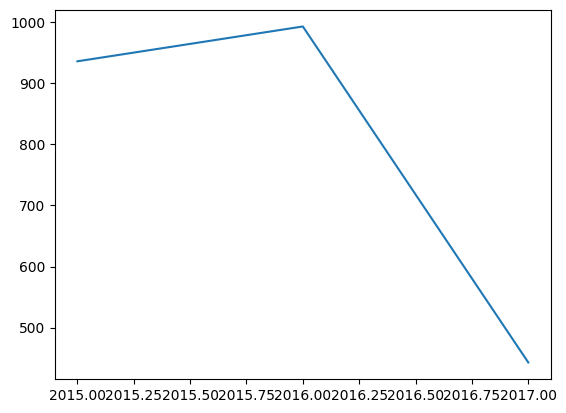

In [96]:
data['Date'] = data['Date'].str.replace(".", "/").replace("//", "/")
data['year'] = data['Date'].apply(lambda x: x.split('/')[-1]) # this line gives year as a string

funding_year = data['year'].value_counts()
year = funding_year.index.astype(int) # this line converts string series to int series

srt_indx = year.argsort()
# argsort() gives the sorted index

year = year[srt_indx]
funding_year = funding_year[srt_indx]

pt.plot(year, funding_year)
pt.show()

Furthermore, I will print the year and the corresponding number of fundings.


In [97]:
for i in range(len(year)) :
  print(year[i], funding_year[i])

2015 936
2016 993
2017 443


## Top Indian Cities

Next, find out which cities are generally chosen for starting a startup. Then,

- Find the top 10 Indian cities with the most number of startups.
- Plot a pie chart to visualize the distribution.
- Print the city name and the number of startups in that city.


## Top Indian Cities

The following adjustments are necessary as per the instructions of the assignment:

- Take the city name "Delhi" as "New Delhi".
- Check the case-sensitiveness of cities. For instance, use "Bangalore" instead of "bangalore".
- For startups with multiple locations (one Indian and one Foreign), count those startups in the Indian startup count (consider the Indian city name first).
- Print the cities in descending order based on the number of startups.


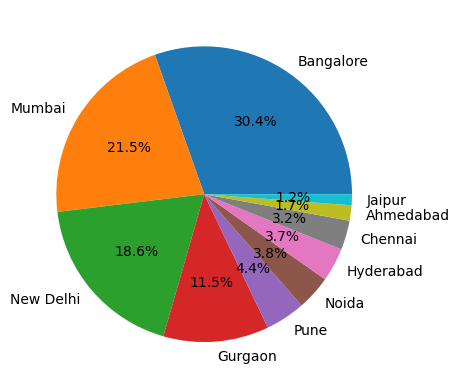

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [98]:
data.dropna(subset=['CityLocation'], inplace=True)
data['city'] = data['CityLocation'].apply(lambda x: x.split('/')[0].strip()).replace({'Delhi':'New Delhi','bangalore':'Bangalore'})

startup_city = data['city'].value_counts().head(10) # we want top 10

pt.pie(startup_city, labels=startup_city.index, autopct='%1.1f%%')
pt.show()

# printing city name and number of startups
for city, count in startup_city.items():
    print(city, count)

## Role of Cities in Funding

Now, let's find out if cities play any role in receiving funding. Perform the following tasks:

- Find the top 10 Indian cities with the most amount of funding received.
- Calculate the percentage of funding each city has received among the top 10 Indian cities.
- Print the city and percentage, rounded off to 2 decimal places.

Print the cities in descending order based on the percentage of funding.


In [99]:
data.dropna(subset=['AmountInUSD'], inplace=True)

data['AmountInUSD'] = data['AmountInUSD'].str.replace(',', '').astype(int)

city_amount = {}

for index, row in data.iterrows():
    value = row['AmountInUSD']
    key = row['city']
    city_amount[key] = city_amount.get(key, 0) + value

cty = np.array(list(city_amount.keys()))
amt = np.array(list(city_amount.values()))

srt_indx = np.argsort(amt)[::-1][:10]

cty = cty[srt_indx]
amt = amt[srt_indx]
prcnt = (amt / amt.sum()) * 100

for i in range(10):
    print(cty[i], "%.2f" % prcnt[i])

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


Pie chart for the above.

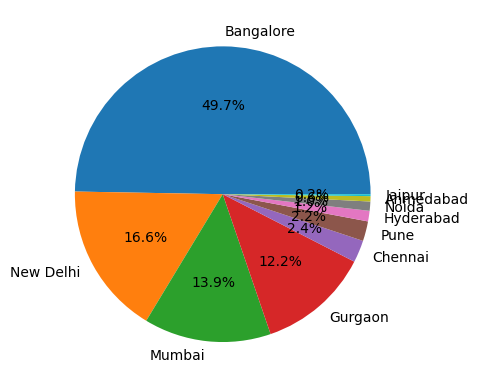

In [100]:
pt.pie(amt, labels=cty, autopct='%1.1f%%')
pt.show()

## Investment Type Analysis

Next, address the following problem:

- There are 4 different types of investments. Find the percentage of the amount funded for each investment type.
- Plot a pie chart to visualize the data.
- Print the investment type and the percentage of the amount funded, rounded off to 2 decimal places.

Note:
Ensure the correct spelling of investment types: "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Check for any potential spelling mistakes by printing unique values from this column.
Print the investment types in descending order with respect to the percentage of the amount funded.


In [101]:
set(data['InvestmentType'])

{'Debt Funding', 'Private Equity', 'Seed Funding'}

In [102]:
data['InvestmentType'].isnull().sum()

0

We observe that this column is already clean, and there are no NULL values present.


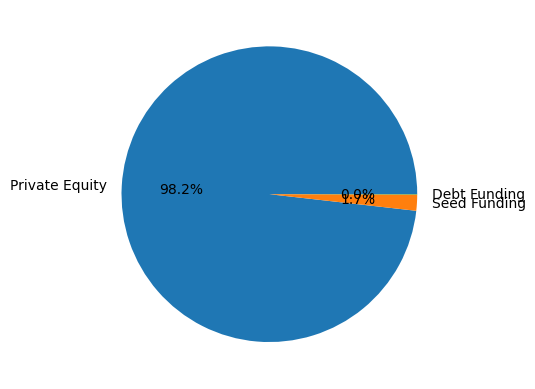

Private Equity 98.21
Seed Funding 1.75
Debt Funding 0.05


array([9.82073017e+01, 1.74701890e+00, 4.56794218e-02])

In [103]:
typ_amnt = {}

for index, row in data.iterrows():
    value = row['AmountInUSD']
    key = row['InvestmentType']
    typ_amnt[key] = typ_amnt.get(key, 0) + value

typ = np.array(list(typ_amnt.keys()))
amnt = np.array(list(typ_amnt.values()))

srt_indx = np.argsort(amnt)[::-1]

typ = typ[srt_indx]
amnt = amnt[srt_indx]
prcnt = (amnt / amnt.sum()) * 100

pt.pie(amnt, labels=typ, autopct='%1.1f%%')
pt.show()

for i in range(3): # because there are only 3 types
    print(typ[i], "%.2f" % prcnt[i])

prcnt # It is in array form containing float

## Top Industries Analysis

Next problem:

Which type of companies got funding more easily? To answer this question, find:

- Top 5 industries and the percentage of the total amount funded to each industry (among the top 5 only).
- Print the industry name and the percentage of the amount funded, rounded off to 2 decimal places.

Note:
Ensure the correct spelling of industries. For example, "Ecommerce" is the appropriate term in the IndustryVertical, so please correct it if necessary.
Print the industries in descending order based on the percentage of the amount funded.


In [104]:
data['IndustryVertical'].isna().sum()

0

In [105]:
set(data['IndustryVertical'])

{'3D Printer Manufacturer',
 'API Workflow platform',
 'Advertising & Marketing Community Networking platform',
 'Affordable Education',
 'Affordable Hotel Booking Online',
 'Alternate Mobile Monetization platform',
 'App Analytics platform',
 'App based Bus Pooling Services',
 'App security\xa0 testing platform',
 'Architectural Design & Consulting',
 'Artificial Intelligence platform',
 'Asset Financing platform',
 'Auto Insurance Online platform',
 'Auto Rickshaw Based Services',
 'Auto Rickshaw based Logistics',
 'Automated Storage & Warehousing Solution',
 'Autorickshaw Aggregator & Booking platform',
 'B2B Merchandize platform',
 'B2B Mobile Auction Marketplace',
 'B2B eCommerce Marketplace',
 'B2C Messaging App',
 'Banking Analytics Platform',
 'Beauty & Lifestyle Mobile Marketplace',
 'Beauty & Wellness Products e-tailer',
 'Beauty and Wellness Marketplace',
 'Bespoke Merchandize Marketplace',
 'Big Data & Analytics Services',
 'Big Data & Analytics platform',
 'Big Data Manage

Again, upon manual inspection, we can observe the following errors in the spelling of 'Ecommerce':
1. ecommerce
2. ECommerce
3. eCommerce


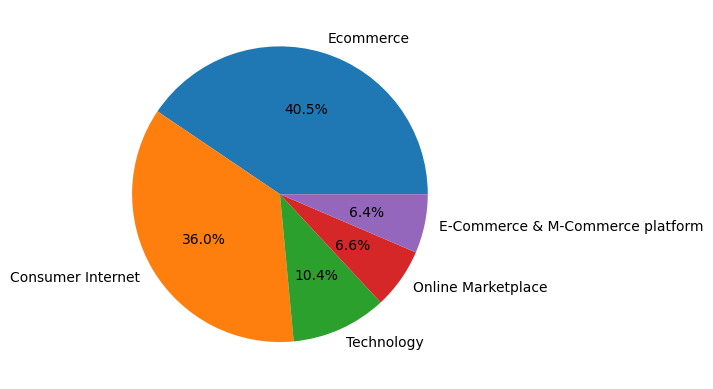

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [106]:
data['IndustryVertical'] = data['IndustryVertical'].replace({'ecommerce':'Ecommerce','ECommerce':'Ecommerce', 'eCommerce':'Ecommerce'})

ind_amnt = {}

for index, row in data.iterrows():
    value = row['AmountInUSD']
    key = row['IndustryVertical']
    ind_amnt[key] = ind_amnt.get(key, 0) + value

ind = np.array(list(ind_amnt.keys()))
amnt = np.array(list(ind_amnt.values()))

srt_indx = np.argsort(amnt)[::-1][:5]

ind = ind[srt_indx]
amnt = amnt[srt_indx]
prcnt = (amnt / amnt.sum()) * 100

pt.pie(amnt, labels=ind, autopct='%1.1f%%')
pt.show()

for i in range(5):
    print(ind[i], "%.2f" % prcnt[i])


## Top Startups Analysis

Next problem:

Find the top 5 startups with the most amount of total funding.
Print the startup names in descending order based on the amount of funding.

Note:
Certain important startups such as Ola, Flipkart, Oyo, and Paytm might have variations in their names. Please correct them accordingly. While there may be numerous errors in startup names, focus on rectifying the significant ones.


In [107]:
set(data['StartupName'])

{'Pocket Aces',
 'Noddapp',
 'UrDoorStep',
 'Baby Berry',
 'Chumbak',
 'i2e1',
 'Zomato',
 'Qlivery',
 'Holidify',
 'LogicRoots',
 'Cupick',
 'Innovaccer',
 'Treebo',
 'Jay Robotix',
 'Qwikspec',
 'Poshtic',
 'Voxweb',
 'MoEngage',
 'Zo Rooms',
 'HealthKart',
 'Voonik',
 'HandyTrain',
 'NeuroEquilibrium',
 'TopRankers',
 'Proximit',
 'CollegeDunia',
 'DocPlexus',
 'Bluestone',
 'Cooey',
 'MergerWare',
 'Khel Now',
 'Ola Cabs',
 'Summerlabel',
 'TrendieApp',
 'Video Ken',
 'Transerv',
 'Loan Frame',
 'BetterPlace',
 'HealthKumbh',
 'Fresh Food Concepts',
 'CBREX',
 'Qik Stay',
 'Nayi Disha',
 'Robosoft',
 'The BlueBook',
 'Supplified',
 'TruckingCube',
 'ePoise',
 'Timesaverz',
 'Impact Analytics',
 'Howdy Ventures',
 'iGenetics',
 'Ketchupp',
 'Tapchief',
 'Bueno',
 'EduPristine',
 'Adytude',
 'Altizone',
 'Capzest',
 'Happy2Refer',
 'Weddingz.in',
 'Holachef',
 'Cloudrino',
 'Care24',
 'PipeCandy',
 'Gapoon',
 'GrowFitter',
 'Noticeboard',
 'Rentickle',
 'imedilane',
 'Campus Diaries'

In [108]:
type(data['AmountInUSD'][0])

numpy.int64

Paytm
Flipkart
Ola
Snapdeal
Oyo


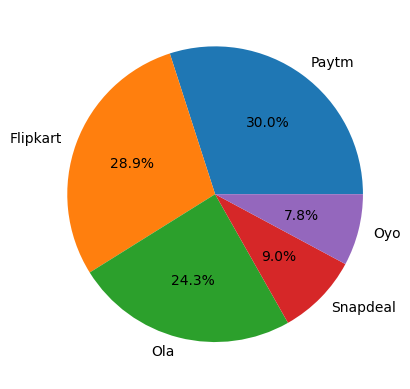

In [109]:
data['StartupName'].replace({'Ola Cabs':'Ola', 'Olacabs':'Ola', 'Flipkart.com':'Flipkart', 'Oyo Rooms':'Oyo', 'OyoRooms':'Oyo', 'Oyorooms':'Oyo', 'OYO Rooms':'Oyo', 'Paytm Marketplace': 'Paytm'}, inplace=True)
invest_amount = data.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)[:5]
startup = invest_amount.index
amount = invest_amount.values
for i in startup :
    print(i)

pt.pie(amount, labels=startup, autopct='%1.1f%%')
pt.show()

## Funding Rounds

Next problem:

Find the top 5 startups that received the most number of funding rounds. This refers to startups that received funding the maximum number of times.
Print the startup names in descending order based on the number of funding rounds, represented as an integer value.


Ola 8
Swiggy 7
Oyo 5
UrbanClap 5
Flipkart 5


<ipython-input-110-9e3295b9ddd0>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in startup_rounds.iteritems() :


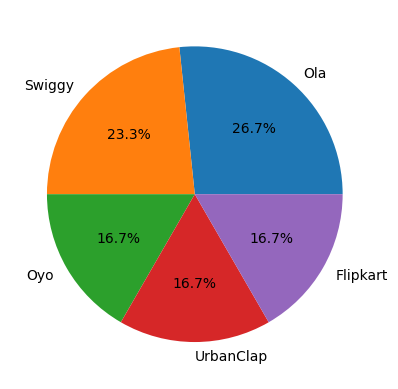

In [110]:
startup_rounds = data.groupby('StartupName').size().sort_values(ascending = False)[:5]
# Printing Those Startups
for index, value in startup_rounds.iteritems() :
    print(index, value)
# Plotting Graph
pt.pie(startup_rounds, labels=startup_rounds.index, autopct='%1.1f%%')
pt.show()

## Top Investors Analysis

Next problem:

Find the investors who have invested the maximum number of times.
Print the investor name and the number of times invested, represented as an integer value.

Note:
In a startup, multiple investors might have invested. Therefore, consider each investor for that startup.
Please disregard undisclosed investors.


In [111]:
data['InvestorsName'].isna().sum()

5

In [112]:
data['InvestorsName'].head()

0                                          Kae Capital
3    Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                       Narottam Thudi, Shireesh Palle
5             Reliance Corporate Advisory Services Ltd
6                                 Infuse Ventures, JLL
Name: InvestorsName, dtype: object

Sequoia Capital 51
Accel Partners 43
SAIF Partners 37
Kalaari Capital 36
Blume Ventures 27


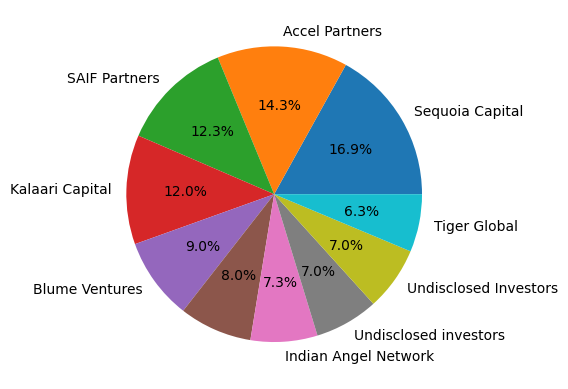

In [113]:
names_list = data['InvestorsName'].dropna().str.split(',').tolist()
flat_list = [name.strip() for sublist in names_list for name in sublist]
sorted_counts = pd.Series(flat_list).value_counts()

for i in range(5) :
  print(sorted_counts.index[i], sorted_counts.iloc[i])
# Pie Chart
pt.pie(sorted_counts.head(10), labels=sorted_counts.head(10).index, autopct='%1.1f%%')
# pt.plot(sorted_counts.index, sorted_counts)
pt.show()

## Final Outcome

With this analysis, we have found the answers to our questions:

1. What type of startups are getting funded in the last few years? The types of startups that receive the most funding are Ecommerce, Consumer Internet, and Technology.

2. Who are the important investors? The topmost important investors are:
    - Sequoia Capital: 51
    - Accel Partners: 43
    - SAIF Partners: 37
    - Kalaari Capital: 36
    - Blume Ventures

3. What are the hot fields that get a lot of funding these days? The fields that receive a lot of funding these days are Ecommerce, Consumer Internet, Technology, and Online Marketplace.
